Raw data:
(1.0, 20.01634, 84.599156)
(2.0, 20.343137, 72.57384)
(3.0, 14.215686, 46.835443)
(4.0, 11.19281, 63.50211)
(5.0, 27.369281, 54.008439)
(6.0, 39.869281, 73.839662)
(7.0, 48.202614, 38.396624)
(8.0, 89.460784, 83.966245)
(9.0, 78.022876, 29.746835)
(10.0, 53.104575, 68.35443)
(11.0, 63.888889, 61.814346)
CPU times: user 4min 17s, sys: 15 s, total: 4min 32s
Wall time: 4min 34s


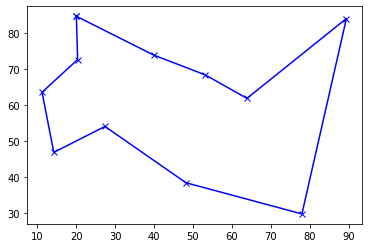

In [18]:
%%time

import re
import json
import matplotlib.pyplot as plt

def read_tsp_file(path):
    """"
    Read TSP file
    """
    city_list = []
    with open('tsp_files/Random4.tsp', 'r') as f:
        data = re.findall(r'\n([0-9].*)', f.read())
   
    # Split each line by space and convert to float
    for line in data:
        city_list.append(tuple(map(float, line.split())))
    return city_list


def calculate_distance(x1, y1, x2, y2):
    """
    Formula to calculate the Euclidean distance 
    """
    # Math library
    import math
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


def distance_between_cities(data):
    """
    Calulate the distance beween all cities 
    """
    distance = dict()
    for i in data:
        for j in data:
            if i == j: 
                continue
            distance[f'{int(i[0])} {int(j[0])}'] = calculate_distance(i[1], i[2], j[1], j[2])
    return distance


def total_distance(tour):
    """
    Calculate total distance by passing completed tour and distance. 
    For example: (1, 2, 3, 4, 1)
    """
    total_distance = 0
    for i in range(1, len(tour)):
        total_distance += distance[f'{tour[i-1]} {tour[i]}']
    return total_distance


def get_all_permutation(city_list):
    """
    Generate a list of all possible permutation with 
    where first and last element matches
    """
    # A Python program to print all  
    # permutations using library function 
    from itertools import permutations
    
    perm = list(permutations(city_list))

    # Add inital city to the tour
    for i in range(len(perm)):
        perm[i] = (*perm[i], perm[i][0])
    return perm


def calculate_all_tours(tour_list):
    """
    Calculate the cost of each tour
    """
    all_distances = []
    for tour in tour_list:
        all_distances.append(total_distance(tour))
    return all_distances



def get_best_tour(tours_total, all_permutation):
    """
    Find and print the tour from the list with minimum cost
    """
    minpos = tours_total.index(min(tours_total))
    min_tour = min(tours_total)
    
    return (minpos,all_permutation[minpos],min_tour)
    
#     print(f'\nBest tour: {minpos} - {all_permutation[minpos]} with total cost: {min_tour}')

    
# Read TSP file
data = read_tsp_file('tsp_files/Random4.tsp')
print('Raw data:')
print(*data,sep='\n')


# Calculate the distance between each city
distance = distance_between_cities(data)
# print(f'\nDistance between each city: \n {json.dumps(distance, indent=1)}')

# Get the list of all cities 
city_list = [int(city[0]) for city in data]
# print(f'\nCity list: {city_list}')

#  Get a list of all possible permutation "tours"
all_permutation = get_all_permutation(city_list)
# print('\nAll possible permutation:')
# print(*all_permutation,sep='\n')

# Calculate the weight of each tour
tours_total = calculate_all_tours(all_permutation)
# print("\nTotal tour cost:")
# for i in range(len(tours_total)):
#     print(f'{i} - {tours_total[i]}')  

min_tour = get_best_tour(tours_total, all_permutation)
# print(f'\nBest tour: {min_tour[0]} - {min_tour[1]} with total cost: {min_tour[2]}')

x = []
y = []
for i in min_tour[1]:
    x.append(data[i-1][1])
    y.append(data[i-1][2])
#     plt.annotation(i, (data[i-1][1], data[i-1][2]))
    
plt.plot(x, y, 'xb-')


